# Analisando os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('exames.csv')
df

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [3]:
# checando valores nulos
df.isna().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

##### Por ter uma grande quantidade de valores nulos na coluna "exame_33", ela sera excluida.

In [4]:
df.drop(columns=['exame_33'],axis=1, inplace=True)

In [5]:
# checando valores nulos
df.isna().sum().sum()

0

In [6]:
df.columns

Index(['id', 'diagnostico', 'exame_1', 'exame_2', 'exame_3', 'exame_4',
       'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_10',
       'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15', 'exame_16',
       'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_29', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

# Segregando os dados em treino e teste

In [7]:
from sklearn.model_selection import train_test_split
from numpy import random

#fator de aleotoriedade
SEED = 123143
random.seed(SEED)

exames = df.drop(columns=['id', 'diagnostico'], axis=1)
diagnostico = df.diagnostico

train_x, test_x, train_y, test_y = train_test_split(exames, diagnostico, test_size=0.3)

# Utilizando modelos de classificacao
### RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

#fator de aleotoriedade
SEED = 123143
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators=100,random_state = 123143)
classificador.fit(train_x, train_y)

print(f'A acuracia do modelo RFC: {round(classificador.score(test_x, test_y)*100,2)}%')  # ira retornar uma valor de acuracia

A acuracia do modelo RFC: 91.81%


### DummyClassifier
    Esse classificador serve como uma linha de base simples para comparar com outros classificadores mais complexos.
    Irei comparar com o modelo acima, o RandomForestClassifier.

In [9]:
from sklearn.dummy import DummyClassifier

#fator de aleotoriedade
SEED = 123143
random.seed(SEED)

#most_frequent = classificador irá sempre prever a classe mais frequente no conjunto de treinamento como resultado.
classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(train_x, train_y)
print(f'A acuracia do modelo DummyClassifier: {round(classificador_dummy.score(test_x, test_y)*100,2)}%') # ira retornar uma valor de acuracia

A acuracia do modelo DummyClassifier: 66.67%


# Estudar o compartamentos das variaveis
    Agora que determinamos nosso baseline como 91.81%, precisamos estudar o comportamento das variáveis, entendendo quais são os valores de "exame_1", por exemplo, que caracterizam um resultado como benigno ou maligno. Estudar o comportamento dos dados é muito mais fácil quando trabalhamos com visualizações, e faremos isso com o ViolinPlot, um gráfico em formato de violino.

In [10]:
# concatenar colunas diagnostico e dos exames. Fiz iloc[] nos exames por ter muitos dados.
df_dados = pd.concat([diagnostico, exames.iloc[:,0:11]], axis=1)

# melt() é usada para transformar um DataFrame "amplo" em um formato "longo". Os dados sao reorganizados e apresentados de maneira mais conveniente para análise e visualização.

df_dados = pd.melt(df_dados, id_vars='diagnostico', var_name='exames', value_name='valores')
df_dados

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
6254,M,exame_11,0.05623
6255,M,exame_11,0.05533
6256,M,exame_11,0.05648
6257,M,exame_11,0.07016


In [11]:
df_dados

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
6254,M,exame_11,0.05623
6255,M,exame_11,0.05533
6256,M,exame_11,0.05648
6257,M,exame_11,0.07016


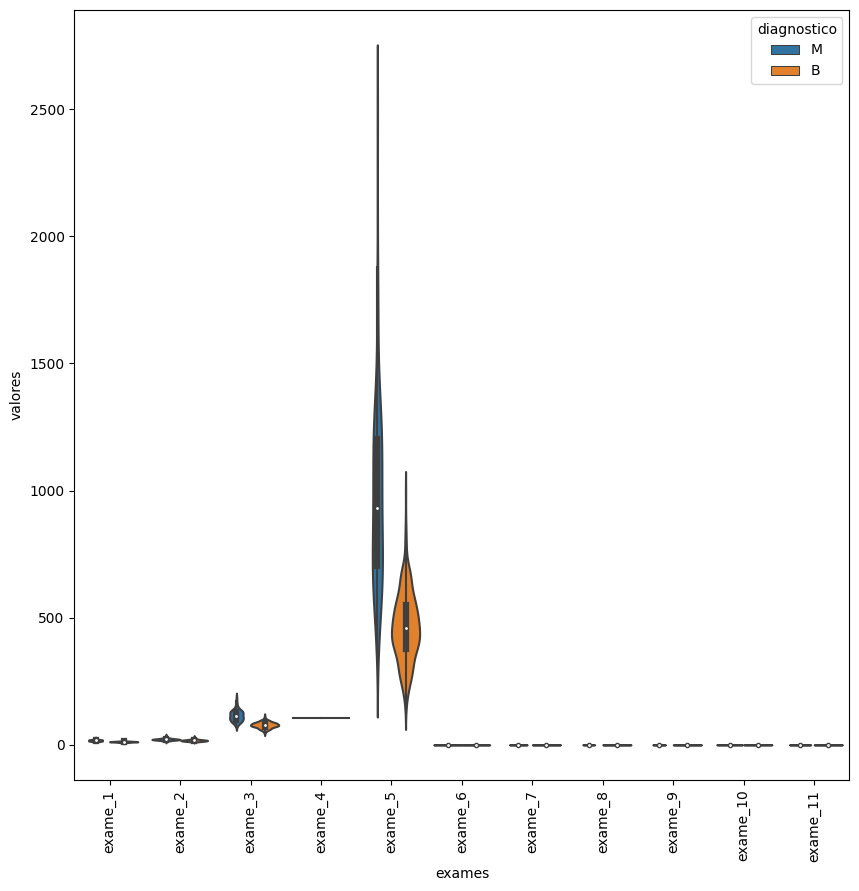

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.violinplot(data=df_dados, x='exames', y='valores', hue='diagnostico')
plt.xticks(rotation = 90)
plt.show()



##### Precisamos encontrar um modo de padronizarmos o eixo Y do nosso gráfico de modo a torná-lo analisável. Para isso, usaremos o StandarScaler do SKlearn, que padroniza os dados de acordo com uma função matemática.

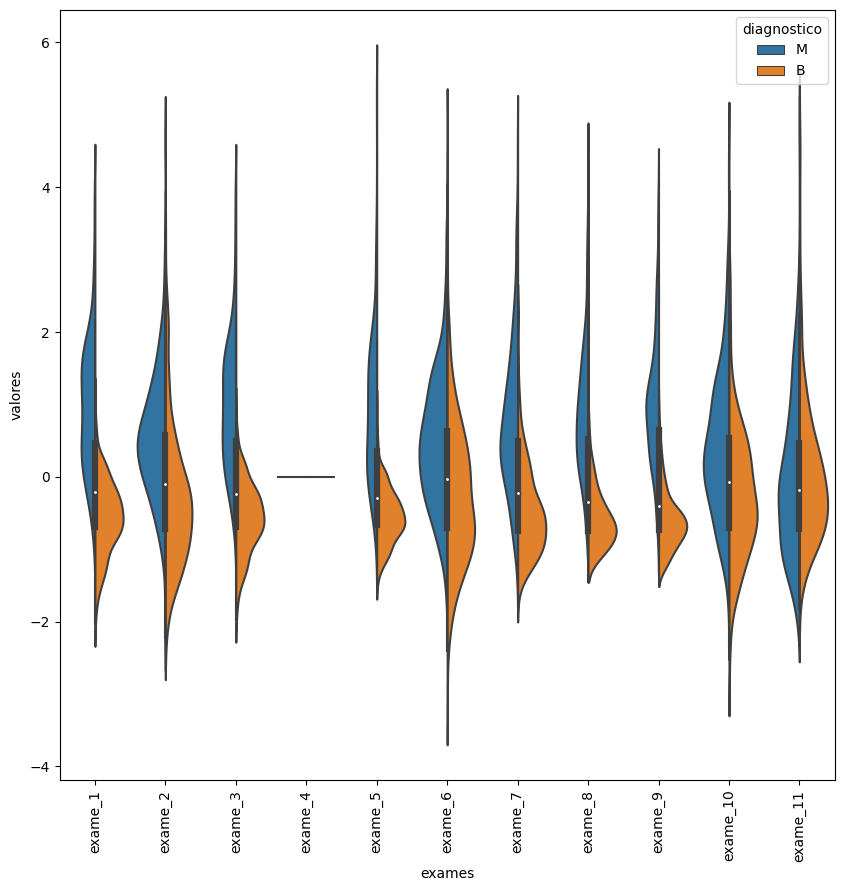

In [13]:
# realizando padronizacao com StandarScaler
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(exames)
exames2 = padronizador.transform(exames)
exames2 = pd.DataFrame(data=exames2, columns=exames.keys())

# concatenar com a nova versap padronizada valores_exames. Fiz iloc[] nos exames por ter muitos dados.
df2 = pd.concat([diagnostico, exames2.iloc[:,0:11]], axis=1)

# melt() para transformar um DataFrame em um formato "longo". Os dados sao reorganizados e apresentados de maneira mais conveniente para análise e visualização.
df_melt = pd.melt(df2, id_vars='diagnostico', var_name='exames', value_name='valores')
df_melt

plt.figure(figsize=(10,10))
sns.violinplot(data=df_melt, x='exames', y='valores', hue='diagnostico', split=True)
plt.xticks(rotation = 90)
plt.show()

##### Quando analisamos especificamente o "exame_2", percebemos que o ponto mais alto da curva laranja está relativamente distante do ponto mais alto da curva azul. Isso significa que esse é um bom exame para diferenciar entre malignos e benignos, diferentemente do "exame_6", no qual os pontos mais altos de cada curva são bastante próximos, ainda que a curva laranja tenha uma forma um pouco menos ondulada.

##### No "exame_4" percebe-se apenas uma reta, deve ser analisado o que ta ocorrendo

In [14]:
df.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

##### Porém, a variável "exame_4" não nos ajuda nessa classificação, já que todos eles têm os mesmos valores. Sendo assim, eliminar essa variável não impactará no processo de classificação, pois ela só está ocupando um espaço desnecessário.

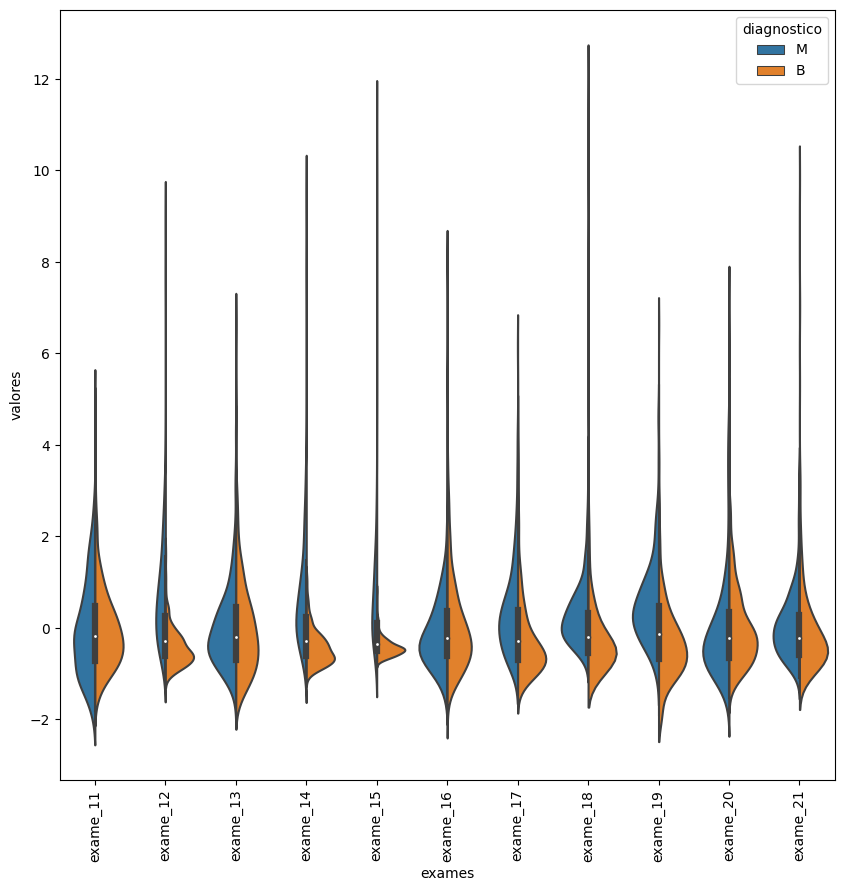

In [15]:
def grafico_violino(valores, inicio, fim):
    # concatenar com a nova versap padronizada valores_exames. Fiz iloc[] nos exames por ter muitos dados.
    df2 = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)

    # melt() para transformar um DataFrame em um formato "longo". Os dados sao reorganizados e apresentados de maneira mais conveniente para análise e visualização.
    df_melt = pd.melt(df2, id_vars='diagnostico', var_name='exames', value_name='valores')
    df_melt

    plt.figure(figsize=(10,10))
    sns.violinplot(data=df_melt, x='exames', y='valores', hue='diagnostico', split=True)
    plt.xticks(rotation = 90)
    return plt.show()

grafico_violino(exames2,10,21)

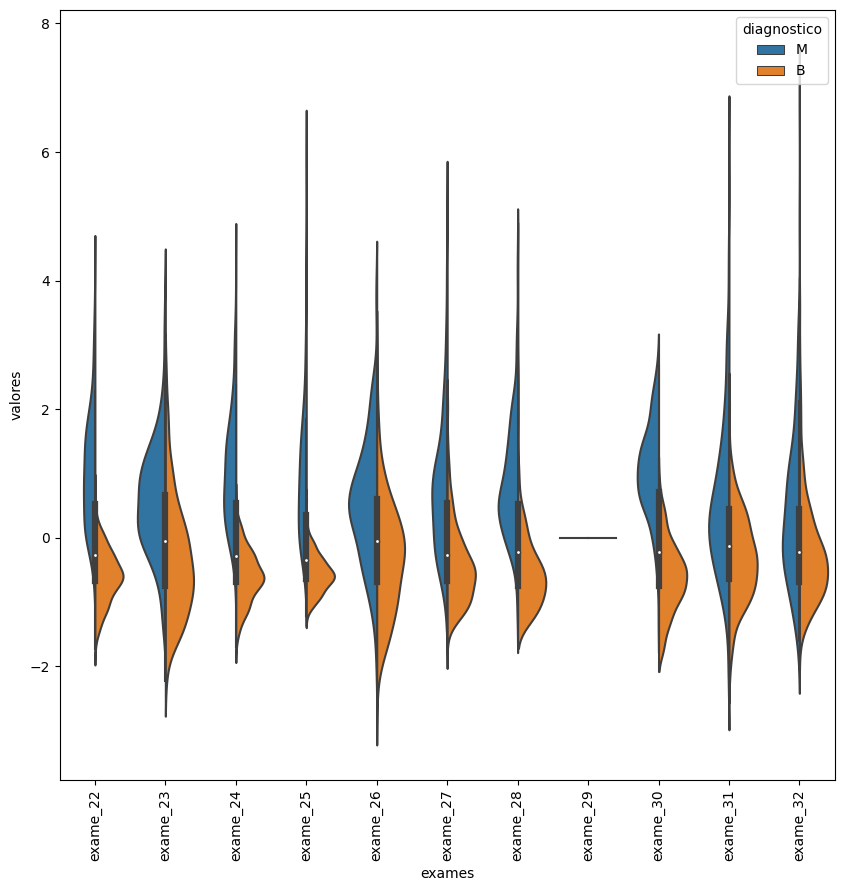

In [16]:
grafico_violino(exames2,21,33)

In [17]:
# retirar colunas com valores constantes: 'exame_4', 'exame_29'
exames3 = exames2.drop(columns=['exame_4', 'exame_29'], axis=1)
exames3

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [18]:
# criar uma nova funcao que ira classificar os dados atualizados.

def classificar(valores):
    #fator de aleotoriedade
    SEED = 123143
    random.seed(SEED)

    train_x, test_x, train_y, test_y = train_test_split(valores, diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100,  random_state = 123143)
    classificador.fit(train_x, train_y)

    return print(f'A acuracia do modelo RFC: {round(classificador.score(test_x, test_y)*100,2)}%')  # ira retornar uma valor de acuracia

classificar(exames3)

A acuracia do modelo RFC: 92.98%


##### Como resultado, teremos 92.98%% - ou seja, com a remoção das constantes (a redução de 2 dimensões), nao tivemos alteracao muito expressiva na acurácia do nosso classificador em relação à baseline que definimos anteriormente. Os valores retirados nao tinham relevancia.

# Realizando Correlacao

In [19]:
matriz_corr = exames3.corr()

<AxesSubplot:>

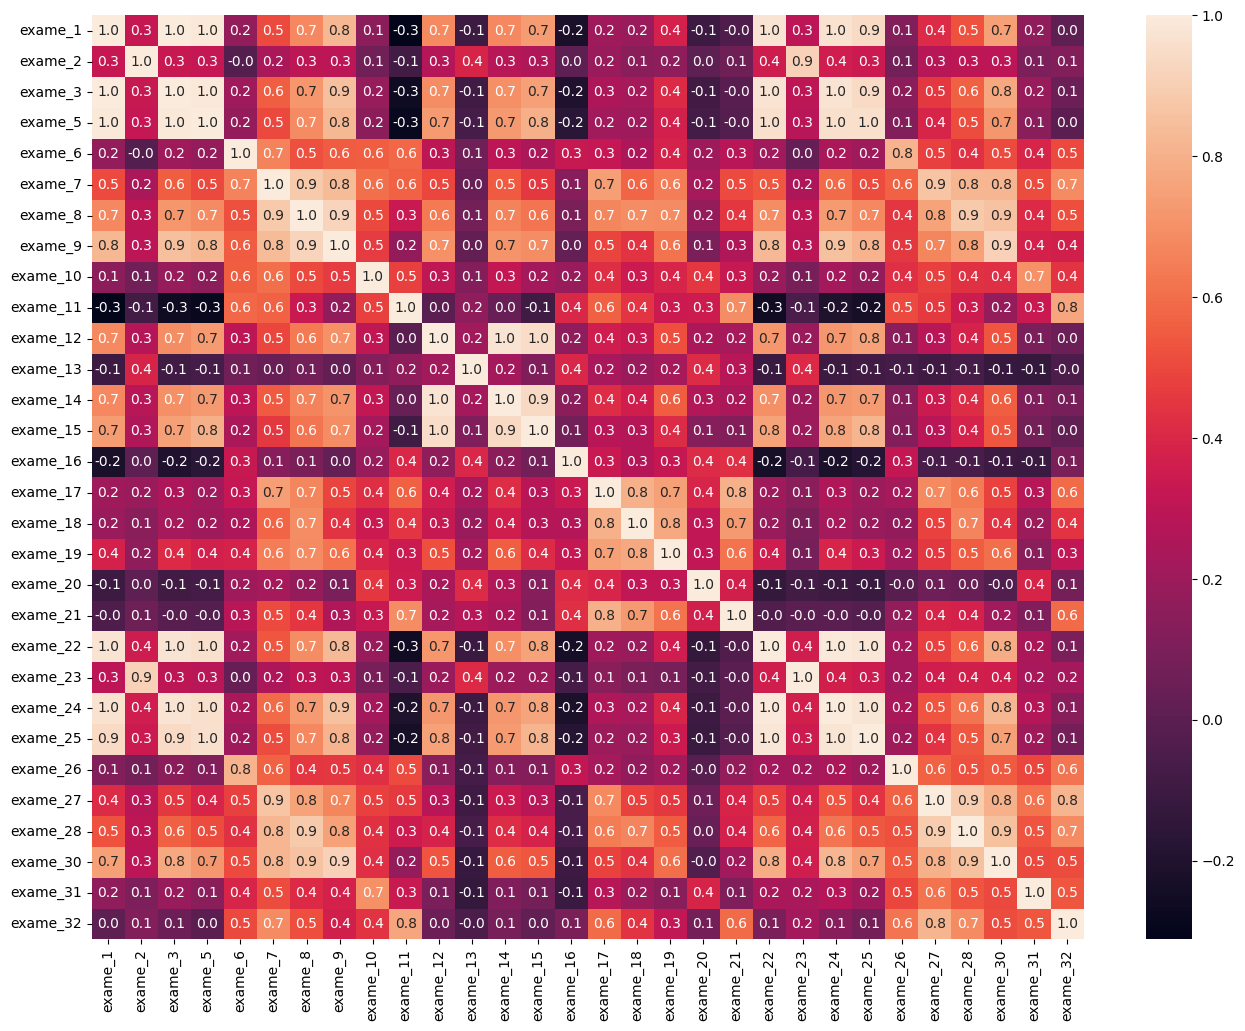

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr, annot=True, fmt='.1f')

In [21]:
# selecionar as matrizes que possuem correlacoes maiores que 0.99, ou seja alta correlacao.
matriz_corr2 = matriz_corr[matriz_corr > 0.99]
matriz_corr2

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# criado a variavel abaixo com a soma da coluna de cada matriz para selecionar os que sao alto correlacionados.
alta_correlacao = matriz_corr2.sum()
alta_correlacao

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [23]:
# depois de ter feito a soma das que sao alto correlacionados, separei os que sao muito alto (altamente) para depois retirar.
altamente_correlacioandos = alta_correlacao[alta_correlacao > 1]
altamente_correlacioandos

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

##### podemos perceber que as features "exame_1" e "exame_3" estão totalmente correlacionadas, da mesma forma que "exame_22" e "exame_24". Sendo assim, removeremos apenas uma feature de cada um desses pares - no caso, "exame_3" e "exame_24", e criaremos um novo dataframe

In [24]:
exames4 = exames3.drop(columns=['exame_3', 'exame_24'])
exames4

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [25]:
# testando o modelo apos esses tratamentos
classificar(exames4)

A acuracia do modelo RFC: 94.15%


# Utilizando o modelo SelectKBest com chi2
    SelectKBest seleciona os recursos de acordo com as k pontuações mais altas.
    
    A função chi2 é baseada em uma medida estatística chamada qui-quadrado, que é usada para avaliar a independência entre duas variáveis categóricas. Ela pode ser usada para selecionar as características mais relevantes de um conjunto de dados categórico com base na sua relação com a variável de destino.



### Tratamento antes de usar SelectKBest e chi2

In [26]:
# A funcao chi2 nao aceita realizar os calculos com valores negativos, conforme a variavel do ultimo tratamento.
exames4

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [27]:
# Irei pegar a variavel exames que nao foi tratada e dropar aquelas colunas que nao sao necessarias de manter.

exames6 = exames.drop(columns=['exame_3', 'exame_4','exame_24', 'exame_29'], axis=1)
exames6

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Apos o tratamento, utilizando o SelectKBest
    1- Criado um objeto SelectKBest com o parâmetro k definido como 5.Este objeto será usado para selecionar as 5 melhores características do conjunto de dados.    
    2 - O próximo passo é dividir o conjunto de dados em conjunto de treinamento e teste. 
    3 - Em seguida, é realizada a seleção de características para o conjunto de treinamento usando o objeto SelectKBest. O método fit ajusta o modelo ao conjunto de treinamento e seleciona as melhores características.
    4 - Depois de selecionar as melhores características, é preciso transformar os conjuntos de treinamento e teste para que contenham apenas essas características. Isso é feito usando o método transform do objeto SelectKBest

    OBS:A vantagem de usar o SelectKBest com k=5 é que ele selecionará as 5 melhores características (features) do conjunto de dados com base em uma determinada medida de importância, neste caso, o teste qui-quadrado (chi2). Isso é útil para reduzir a dimensionalidade do conjunto de dados, o que pode levar a modelos mais simples, mais eficientes e menos propensos a overfitting.

    Além disso, ao selecionar apenas as 5 melhores características, você pode aumentar a interpretabilidade do modelo, tornando mais fácil para os usuários entenderem quais variáveis estão mais fortemente relacionadas com a variável resposta ou alvo (target).

    É importante notar que a escolha de k deve ser feita com cuidado e pode depender do tamanho do conjunto de dados, da quantidade de características disponíveis e do desempenho do modelo resultante. Portanto, é sempre recomendável avaliar o desempenho do modelo com diferentes valores de k e compará-los antes de escolher um valor definitivo.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SEED = 123143
random.seed(SEED)

selecionar_kmelhores = SelectKBest(chi2, k=5)

train_x, test_x, train_y, test_y = train_test_split(exames6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(train_x, train_y)
train_kbest = selecionar_kmelhores.transform(train_x)
test_kbest = selecionar_kmelhores.transform(test_x)

In [29]:
train_kbest.shape

(398, 5)

### Treinar o modelo com apenas essas cinco features e realizar a classificação

In [30]:
#fator de aleotoriedade
SEED = 123143
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators=100, random_state = 123143)
classificador.fit(train_kbest, train_y)

print(f'A acuracia do modelo RandomForestClassifier com apenas 5 exames: {round(classificador.score(test_kbest, test_y)*100,2)}%')  # ira retornar uma valor de acuracia

A acuracia do modelo RandomForestClassifier com apenas 5 exames: 96.49%


##### O último resultado que obtivemos antes desse tratamento foi de 92.98%, quando havíamos excluído apenas 4 features. Dessa vez, temos 96.49% utilizando apenas 5 features, uma redução de 85% do nosso conjunto de dados (5/33). Na realidade da Alura Care, supondo que cada exame tem o mesmo custo, tivemos uma redução de 85%! Isso parece um sucesso, não? Mas será que analisar somente a acurácia é o suficiente, ou seria mais interessante trabalharmos mais detalhadamente na análise dos nossos dados?

## Gerando matriz de confusao referente ao modelo SelectKBest
    Nos removemos um volume muito grande de informações, e não sabemos exatamente qual o impacto disso. Será que estamos acertando mais quando o câncer é do tipo benigno? Ou errando mais quando ele é do tipo maligno?

Na matriz de confusao existe alguns parametros que precisar ser passados: sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

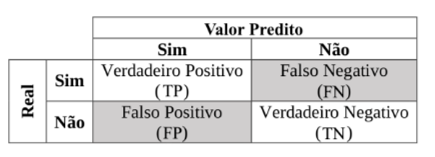

In [31]:
# realizando o y_pred

y_pred = classificador.predict(test_kbest)
print(y_pred)

['B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M'
 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B']


In [32]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(test_y,y_pred)
matriz_confusao

array([[112,   2],
       [  4,  53]])

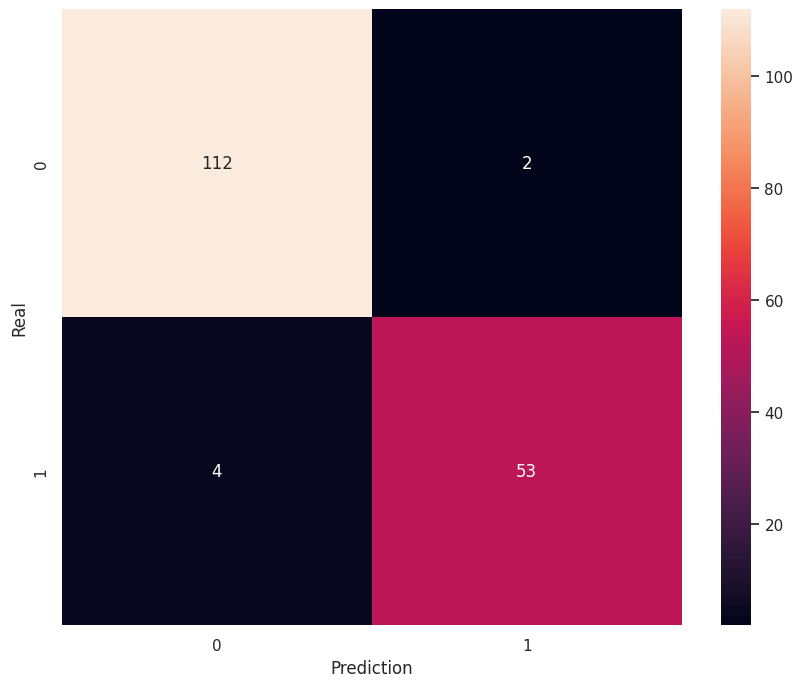

In [33]:
# Criando um melhor visualização da matriz de confusao

plt.figure(figsize=(10,8))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Prediction', ylabel= 'Real')
plt.show()

##### O eixo Y está representando nossos valores reais, e o eixo X representa os valores de predição. Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno. A soma dos dois quadrados superiores nos trará o total de cânceres diagnosticados como benignos, e a dos dois quadrados inferiores o total de cânceres diagnosticados como malignos.

##### De 114 casos benignos, nosso modelo acertou 112, classificando o restante (2) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 53, classificando 4 como benignos. 

# Utlizando modelo  Recursive Feature Elimination (RFE) 
    A classe RFE em Scikit-learn é um algoritmo de seleção de recursos que visa selecionar as melhores características em um conjunto de dados. Ele usa uma abordagem recursiva, onde inicialmente um modelo é ajustado ao conjunto completo de recursos e, em seguida, as características menos importantes são eliminadas, uma a uma, até que o número desejado de características seja atingido.

In [34]:
from sklearn.feature_selection import RFE

SEED = 123143
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(exames6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 123143)


selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(train_x, train_y)
treino_rfe = selecionador_rfe.transform(train_x)
test_rfe = selecionador_rfe.transform(test_x)
classificador.fit(treino_rfe, train_y)

RandomForestClassifier(random_state=123143)

##### Explicando o codigo acima, passo a passo:
    Este código realiza a seleção de recursos utilizando o método Recursive Feature Elimination (RFE) da biblioteca Scikit-learn. O conjunto de dados é dividido em um conjunto de treinamento e um conjunto de teste usando a função train_test_split() também da biblioteca Scikit-learn.

    O classificador utilizado é um RandomForestClassifier com 100 estimadores, que é ajustado ao conjunto de treinamento usando o método fit(). Em seguida, a RFE é aplicada ao classificador utilizando o método RFE(). O argumento estimator recebe o classificador RandomForestClassifier previamente ajustado, n_features_to_select define o número de características a serem selecionadas (5 neste caso) e step define o número de características a serem removidas a cada iteração.

    O método fit() da RFE é então aplicado ao conjunto de treinamento e seus respectivos rótulos. O conjunto de treinamento é transformado utilizando o método transform() da RFE, produzindo um conjunto de treinamento reduzido contendo apenas as 5 características selecionadas.

    O conjunto de teste também é transformado utilizando a mesma RFE e o método transform(), produzindo um conjunto de teste com as mesmas 5 características selecionadas. O classificador é ajustado novamente aos dados de treinamento reduzidos usando o método fit(), e é utilizado para fazer previsões no conjunto de teste reduzido usando o método predict().

## Gerando matriz de confusao referente ao Modelo RFE

In [35]:
# realizando o y_pred

y_pred = classificador.predict(test_rfe)
print(y_pred)

['B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M'
 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B']


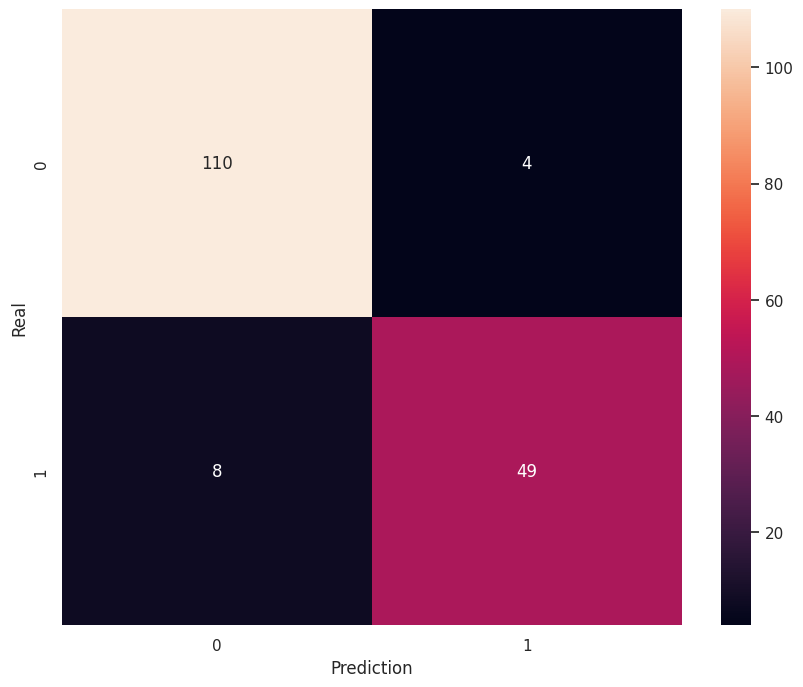

A acuracia do modelo RandomForestClassifier com o modelo RFE: 92.98%


In [36]:
SEED = 123143
random.seed(SEED)

matriz_confusao = confusion_matrix(test_y, y_pred)

# Criando uma melhor visualização da matriz de confusao

plt.figure(figsize=(10,8))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Prediction', ylabel= 'Real')
plt.show()

print(f'A acuracia do modelo RandomForestClassifier com o modelo RFE: {round(classificador.score(test_rfe, test_y)*100,2)}%')  # ira retornar uma valor de acuracia

##### Perceba que o resultado com o RFE foi um pouco pior que os outros métodos que utilizamos anteriormente, que chegavam a 96.49%. Sendo assim, o SelectKBest aparenta ser um pouco melhor, pelo menos para esses dados.

##### Pelo mapa de calor, não temos nenhuma diferença nas previsões. Entretanto, O RFE acaba errando mais em relação ao diagnóstico de cânceres malignos.

# Utilizando o modelo RFE Cross Validation (RFECV)
    Até o momento nós selecionamos algumas features com base em visualizações, como o Violin Plot e a Matriz de Correlação, e com alguns algoritmos mais automatizados, como o SelectKBest e o RFE. No caso desses algoritmos, nós determinamos quantas features gostaríamos que fossem selecionadas - no nosso caso 5, mas poderiam ser 10, 15 ou qualquer outro número, dependendo da necessidade.

    A questão agora é: será que existe alguma técnica que nos informa qual conjunto de features gerará o melhor resultado?

##### Os parâmetros do RFECV são:
    estimator: é o modelo de aprendizado de máquina a ser ajustado. No código dado, o estimator é o objeto classificador que foi previamente criado como um classificador RandomForestClassifier.
    cv: é o número de divisões utilizadas para a validação cruzada. No código, cv=5 significa que a validação cruzada é realizada com 5 divisões (ou "folds").
    step: é o número de características a serem removidas em cada iteração do processo de seleção recursiva. No código, step=1 significa que uma característica é removida a cada iteração.
    scoring: é a métrica utilizada para avaliar o desempenho do modelo durante o processo de seleção recursiva. No código, a métrica escolhida é a "acurácia" (accuracy), que mede a proporção de previsões corretas do modelo.

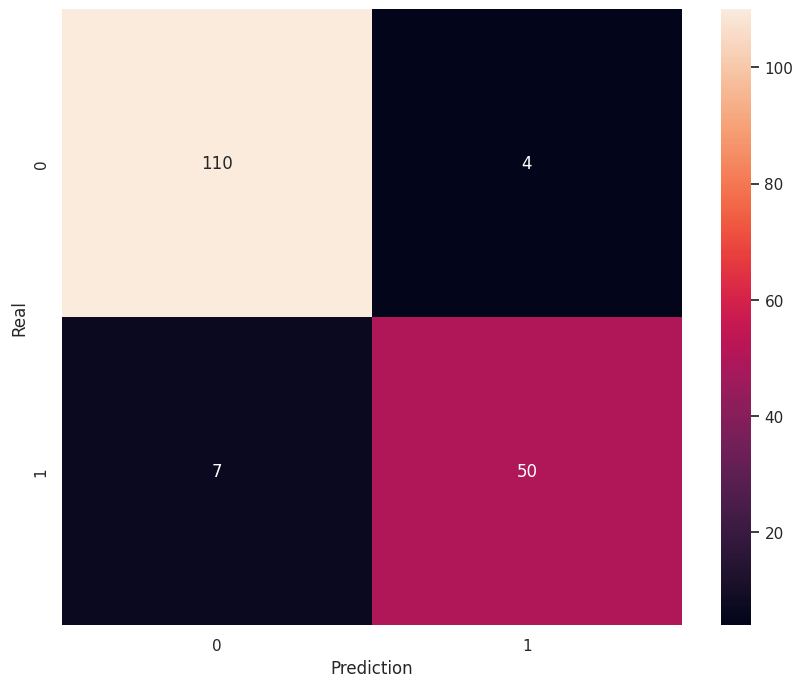

A acuracia do modelo RandomForestClassifier com o modelo RFECV: 93.57%


In [37]:
from sklearn.feature_selection import RFECV

SEED = 123143
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(exames6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 123143)

selecionador_rfecv = RFECV(estimator=classificador, cv=5, scoring='accuracy', step=1)
selecionador_rfecv.fit(train_x, train_y)
treino_rfecv = selecionador_rfecv.transform(train_x)
test_rfecv = selecionador_rfecv.transform(test_x)
classificador.fit(treino_rfecv, train_y)

# realizando o y_pred
y_pred = classificador.predict(test_rfecv)

# criando matriz de confusao
matriz_confusao = confusion_matrix(test_y, y_pred)

# Criando uma melhor visualização da matriz de confusao

plt.figure(figsize=(10,8))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Prediction', ylabel= 'Real')
plt.show()

print(f'A acuracia do modelo RandomForestClassifier com o modelo RFECV: {round(classificador.score(test_rfecv, test_y)*100,2)}%')  # ira retornar uma valor de acuracia

## Acessando as features do modelo RFECV

In [40]:
# O modelo precisa de 21 features para definir o melhor resultado possivel.
selecionador_rfecv.n_features_

21

In [41]:
# Essas sao as 21 features que o modelo selecionou
train_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [43]:
#  utilizar o selecionador_rfecv.cv_results_['mean_test_score'] para conseguirmos um score acumulativo para cada uma das features.
len(selecionador_rfecv.cv_results_['mean_test_score'])

28

<function matplotlib.pyplot.show(close=None, block=None)>

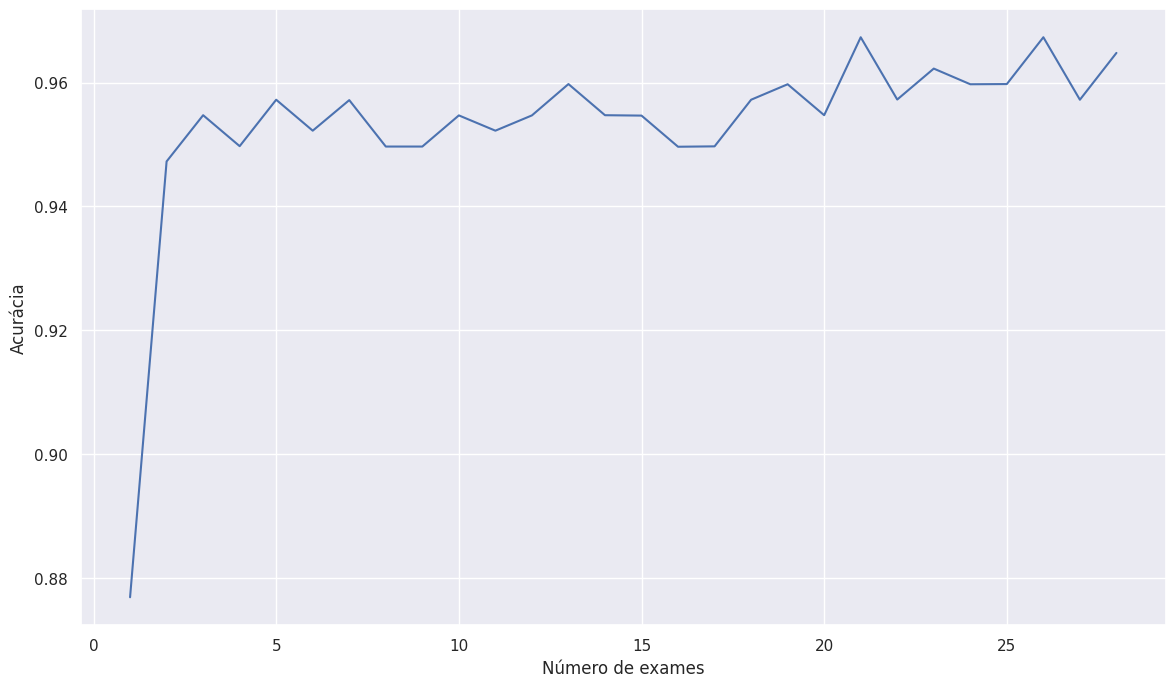

In [44]:
plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

##### Como é possível verificar no gráfico, 21 é o número de features que nos retorna o maior score. Mas por que 0.97 se nossa maior acurácia na verdade foi 93.57%? Isso acontece pois o retorno de grid_scores_ é uma média dos scores de cada um dos blocos entre os quais nosso conjunto foi dividido, e não um valor real.

##### Todos os métodos que utilizamos até o momento (SelectKBest, RFE e RFECV) selecionaram, como um filtro, algumas features, e por isso são chamados de "métodos de seleção de features" (feature selection methods).

# Utilizando PCA (Principal Component Analysis)
    PCA é uma técnica de análise multivariada que transforma um conjunto de variáveis ​​correlacionadas em um conjunto de variáveis ​​não correlacionadas chamadas componentes principais. A ideia é encontrar um novo conjunto de variáveis ​​que capture a maior parte da variação nos dados originais. Isso é útil para visualização, compressão de dados e redução de ruído nos dados.

    Irei colocar o n_components = 2, que é o número de variáveis que queremos ter como retorno.

In [62]:
# O ultima dado com tratamento deve ser o utilizado para melhor aplicacao do desse metodo
exames4

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
exames8 = pca.fit_transform(exames4)


In [64]:
exames8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148886],
       [ 5.24751143, -1.46792043],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

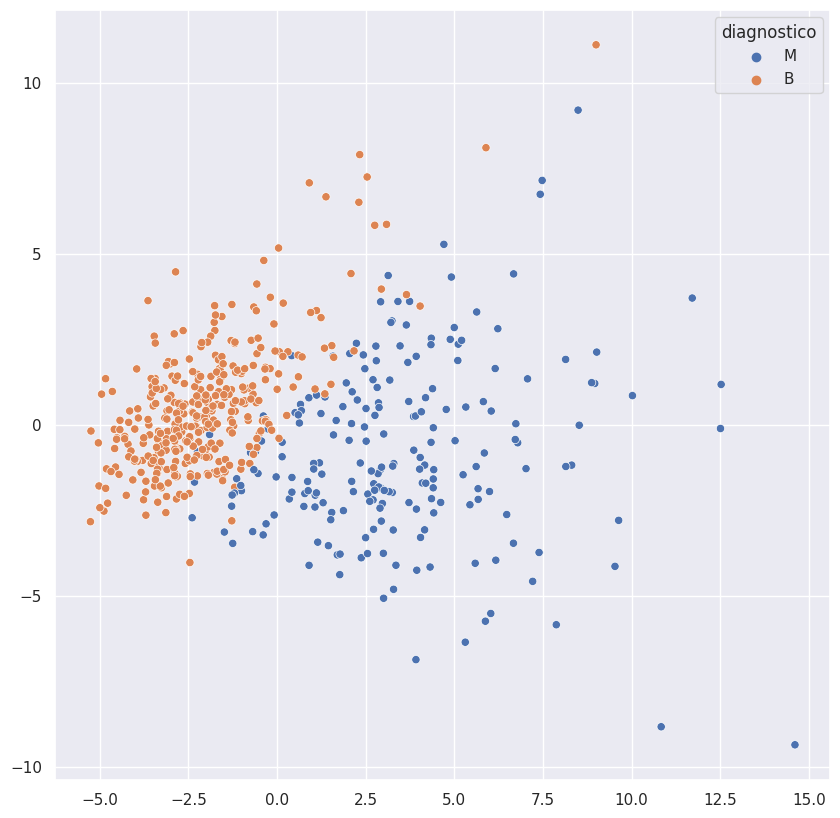

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = exames8[:,0], y = exames8[:,1], hue = diagnostico)
plt.show()

##### Dessa forma, conseguiremos enxergar de maneira mais clara onde existem pontos com maiores confusões, traçando uma linha que dividirá os cânceres dos tipos maligno ou benigno. Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.

# Utilizando TSNE (t-distributed stochastic neighbor embedding)
     Uma técnica de redução de dimensionalidade não-linear comumente usada em análise exploratória de dados e visualização.

    O t-SNE é uma técnica de aprendizado não supervisionado que mapeia dados de alta dimensão em um espaço de baixa dimensão (geralmente 2 ou 3 dimensões) para facilitar a visualização e a interpretação dos padrões presentes nos dados. Ele faz isso minimizando a divergência entre as distribuições de probabilidade de distâncias em alta e baixa dimensões, enquanto preserva a informação de vizinhança entre os pontos.

/home/carlos/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/carlos/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


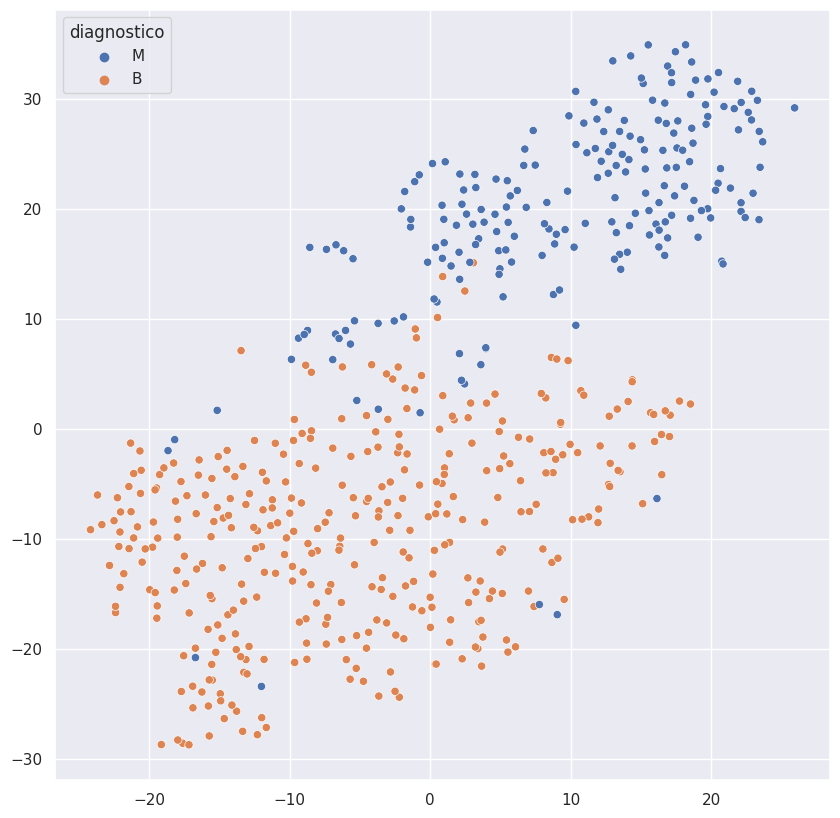

In [66]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
exames9 = tsne.fit_transform(exames4)

plt.figure(figsize=(10,10))
sns.scatterplot(x = exames9[:,0], y = exames9[:,1], hue = diagnostico)
plt.show()

##### Como resultado, teremos uma visualização que separa muito bem os dados no espaço, tornando mais claro quais pontos estão próximos de um tipo de câncer maligno ou benigno. Assim, é bem mais simples determinar uma fronteira entre tais classificações.

##### Os métodos PCA e TSNE servem para reduzir a dimensionalidade dos nossos dados e isso nos ajuda no momento de entender eles em um plano 2D ou 3D. Então foi reduzido a dimensionalidade do dataset de 28 dimensões (28 colunas) para apenas 2 (x e y) que está utilizando para plotar em um gráfico.

##### Utilizando o PCA ou o TSNE para reduzir a dimensionalidade e visualizar os dados em um gráfico é possível entender alguns dados de uma forma melhor, onde em apenas 2 eixos temos a explicação de muitas outras dimensões.